<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Dataset 1</p>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
base_dir = os.path.abspath('../data')      
data_file = base_dir + r'/RunDataTable.tsv'
relationship_def_file = base_dir + r'/RelationshipDefTable.tsv'
relationship_data_file = base_dir + r'/RelationshipDataTable.tsv'
summary_statistics_data_file = base_dir + r'/SummaryStatisticsDataTable.tsv'
variable_def_table = base_dir + r'/VariableDefTable.tsv'
base_dir

'/home/workstation/PycharmProjects/urban world/data'

In [2]:
data = pd.read_table(data_file,parse_dates=True)
data.head(10)

,Timestep,VariableName,EntityIdx,Value,Notes
0,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-be21339064,"{""Request"":""2. General Visit Data""}"
1,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-8b81c9c6c1,"{""Request"":""2. General Visit Data""}"
2,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-9b271286d9,"{""Request"":""2. General Visit Data""}"
3,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-83f46b5710,"{""Request"":""2. General Visit Data""}"
4,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-e543e73d48,"{""Request"":""2. General Visit Data""}"
5,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-b8c0f61545,"{""Request"":""2. General Visit Data""}"
6,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-9bdd784e2b,"{""Request"":""2. General Visit Data""}"
7,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-c676760f74,"{""Request"":""2. General Visit Data""}"
8,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-3f2eca3a94,"{""Request"":""2. General Visit Data""}"
9,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-68dacdaf66,"{""Request"":""2. General Visit Data""}"


In [3]:
data[data['VariableName']=='CurrentVisitor']

,Timestep,VariableName,EntityIdx,Value,Notes
0,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-be21339064,"{""Request"":""2. General Visit Data""}"
1,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-8b81c9c6c1,"{""Request"":""2. General Visit Data""}"
2,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-9b271286d9,"{""Request"":""2. General Visit Data""}"
3,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-83f46b5710,"{""Request"":""2. General Visit Data""}"
4,2019-08-01 00:00:00,CurrentVisitor,Site-2626,UID-e543e73d48,"{""Request"":""2. General Visit Data""}"
...,...,...,...,...,...
12875097,2019-10-31 23:50:00,CurrentVisitor,Site-2660,UID-ec7ad67a0f,"{""Request"":""2. General Visit Data""}"
12875098,2019-10-31 23:50:00,CurrentVisitor,Site-5333,UID-e58d931b22,"{""Request"":""2. General Visit Data""}"
12875099,2019-10-31 23:50:00,CurrentVisitor,Site-7990,UID-fcbbb19805,"{""Request"":""2. General Visit Data""}"
12875100,2019-10-31 23:55:00,CurrentVisitor,Site-5333,UID-e58d931b22,"{""Request"":""2. General Visit Data""}"


In [ ]:
data['VariableName'].unique()

In [ ]:
data[data['VariableName']=='Checkin']

In [4]:
temp=data[data['VariableName']=='Checkin']
site_2629_checkin_data = temp[temp['Value']=='Site-2629']

site_2629_checkin_data = site_2629_checkin_data.groupby('Timestep')[['EntityIdx']].count()
# print(site_2629_checkin_data.head(50))
site_2629_checkin_data.index = pd.to_datetime(site_2629_checkin_data.index)
site_2629_checkin_data =  site_2629_checkin_data.resample('D').sum()
site_2629_checkin_data.head(10)

,EntityIdx
Timestep,
2019-08-01,3
2019-08-02,8
2019-08-03,11
2019-08-04,16
2019-08-05,7
2019-08-06,4
2019-08-07,8
2019-08-08,9
2019-08-09,9


In [5]:
temp=data[data['VariableName']=='CurrentVisitor']
site_2629_data = temp[temp['EntityIdx']=='Site-2629']
site_5298_data = temp[temp['EntityIdx']=='Site-5298']
site_5299_data = temp[temp['EntityIdx']=='Site-5299']
site_10648_data = temp[temp['EntityIdx']=='Site-10648']
site_7976_data = temp[temp['EntityIdx']=='Site-7976']
site_2629_data

,Timestep,VariableName,EntityIdx,Value,Notes
8,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-3f2eca3a94,"{""Request"":""2. General Visit Data""}"
9,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-68dacdaf66,"{""Request"":""2. General Visit Data""}"
10,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-b64daba2a4,"{""Request"":""2. General Visit Data""}"
11,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-1675bc4207,"{""Request"":""2. General Visit Data""}"
12,2019-08-01 00:00:00,CurrentVisitor,Site-2629,UID-75549d715f,"{""Request"":""2. General Visit Data""}"
...,...,...,...,...,...
12098295,2019-10-31 23:50:00,CurrentVisitor,Site-2629,UID-323b6cf781,"{""Request"":""2. General Visit Data""}"
12098296,2019-10-31 23:50:00,CurrentVisitor,Site-2629,UID-20cbbe1d8d,"{""Request"":""2. General Visit Data""}"
12098343,2019-10-31 23:55:00,CurrentVisitor,Site-2629,UID-84b507f542,"{""Request"":""2. General Visit Data""}"
12098344,2019-10-31 23:55:00,CurrentVisitor,Site-2629,UID-323b6cf781,"{""Request"":""2. General Visit Data""}"


In [6]:
site_2629_visit_data =  pd.DataFrame(site_2629_data.groupby('Timestep')['Value'].apply(' '.join))
site_5298_visit_data =  pd.DataFrame(site_5298_data.groupby('Timestep')['Value'].apply(' '.join))
site_5299_visit_data =  pd.DataFrame(site_5299_data.groupby('Timestep')['Value'].apply(' '.join))
site_10648_visit_data =  pd.DataFrame(site_10648_data.groupby('Timestep')['Value'].apply(' '.join))
site_7976_visit_data =  pd.DataFrame(site_7976_data.groupby('Timestep')['Value'].apply(' '.join))
site_7976_visit_data

,Value
Timestep,
2019-08-01 00:00:00,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...
2019-08-01 00:05:00,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...
2019-08-01 00:10:00,UID-1abf514a34 UID-dec9c34e09 UID-8bddb16882 U...
2019-08-01 00:15:00,UID-1abf514a34 UID-8bddb16882 UID-eaa2daa12b
2019-08-01 00:20:00,UID-1abf514a34 UID-8bddb16882 UID-eaa2daa12b
...,...
2019-10-31 22:50:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...
2019-10-31 22:55:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...
2019-10-31 23:00:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a


In [7]:
site_2629_visit_data['Prev_value'] = site_2629_visit_data.shift(1)['Value']
site_5298_visit_data['Prev_value'] = site_5298_visit_data.shift(1)['Value']
site_5299_visit_data['Prev_value'] = site_5299_visit_data.shift(1)['Value']
site_10648_visit_data['Prev_value'] = site_10648_visit_data.shift(1)['Value']
site_7976_visit_data['Prev_value'] = site_7976_visit_data.shift(1)['Value']
site_7976_visit_data

,Value,Prev_value
Timestep,,
2019-08-01 00:00:00,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...,NaN
2019-08-01 00:05:00,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...
2019-08-01 00:10:00,UID-1abf514a34 UID-dec9c34e09 UID-8bddb16882 U...,UID-1abf514a34 UID-dec9c34e09 UID-162b1d1694 U...
2019-08-01 00:15:00,UID-1abf514a34 UID-8bddb16882 UID-eaa2daa12b,UID-1abf514a34 UID-dec9c34e09 UID-8bddb16882 U...
2019-08-01 00:20:00,UID-1abf514a34 UID-8bddb16882 UID-eaa2daa12b,UID-1abf514a34 UID-8bddb16882 UID-eaa2daa12b
...,...,...
2019-10-31 22:50:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...
2019-10-31 22:55:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...
2019-10-31 23:00:00,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a,UID-63fd2226a3 UID-ad6a1601a4 UID-4efcaea64a U...


In [8]:
def func(x):
#     print(x)
    if pd.isna(x['Value'])==False:
        a = set(x['Value'].split())
    else:
        a=set()
    
    if pd.isna(x['Prev_value'])==False:
        b = set(x['Prev_value'].split())
    else:
        b = set()
#     print(x, y, y.difference(x))
    return len(a.difference(b))
    
# r =pd.DataFrame([func(x, y) for x, y in zip(df1['Value'], df2['Value'])])
site_2629_visit_data['count']=site_2629_visit_data.apply(lambda x: func(x),  axis=1)
site_2629_visit_data=site_2629_visit_data[['count']]

site_5298_visit_data['count']=site_5298_visit_data.apply(lambda x: func(x),  axis=1)
site_5298_visit_data=site_5298_visit_data[['count']]

site_5299_visit_data['count']=site_5299_visit_data.apply(lambda x: func(x),  axis=1)
site_5299_visit_data=site_5299_visit_data[['count']]

site_10648_visit_data['count']=site_10648_visit_data.apply(lambda x: func(x),  axis=1)
site_10648_visit_data=site_10648_visit_data[['count']]

site_7976_visit_data['count']=site_7976_visit_data.apply(lambda x: func(x),  axis=1)
site_7976_visit_data=site_7976_visit_data[['count']]

In [9]:
site_2629_visit_data.index = pd.to_datetime(site_2629_visit_data.index)
site_5298_visit_data.index = pd.to_datetime(site_5298_visit_data.index)
site_5299_visit_data.index = pd.to_datetime(site_5299_visit_data.index)
site_10648_visit_data.index = pd.to_datetime(site_10648_visit_data.index)
site_7976_visit_data.index = pd.to_datetime(site_7976_visit_data.index)

site_2629_visit_data=site_2629_visit_data.resample('D').sum()
site_5298_visit_data=site_5298_visit_data.resample('D').sum()
site_5299_visit_data=site_5299_visit_data.resample('D').sum()
site_10648_visit_data=site_10648_visit_data.resample('D').sum()
site_7976_visit_data=site_7976_visit_data.resample('D').sum()

site_2629_visit_data

,count
Timestep,
2019-08-01,294
2019-08-02,268
2019-08-03,545
2019-08-04,497
2019-08-05,205
...,...
2019-10-27,209
2019-10-28,125
2019-10-29,121


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b7bf7b10>],
      dtype=object)

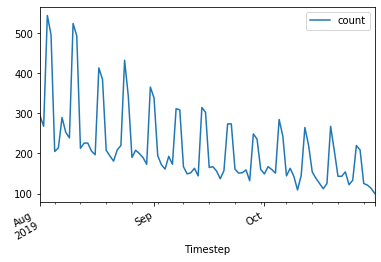

In [10]:
site_2629_visit_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b7674290>],
      dtype=object)

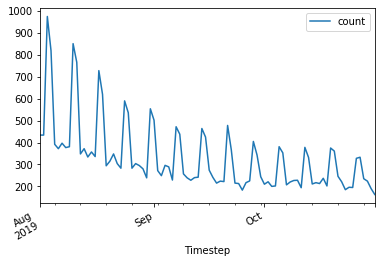

In [11]:
site_5298_visit_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b7a69ed0>],
      dtype=object)

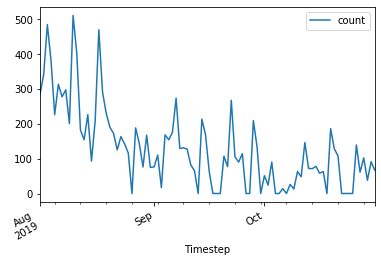

In [12]:
site_5299_visit_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b7a2ac90>],
      dtype=object)

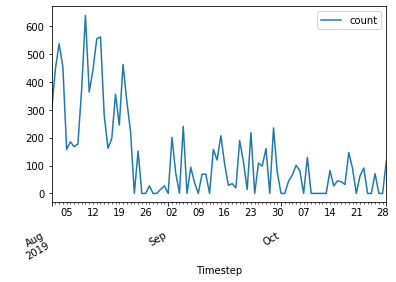

In [13]:
site_10648_visit_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b79b98d0>],
      dtype=object)

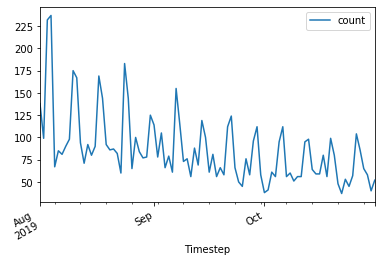

In [14]:
site_7976_visit_data.plot(subplots=True)

In [15]:
relationship_def = pd.read_table(relationship_def_file)
relationship_def.head(10)

,Name,LongName,Values,VarType,DataType,Notes
0,Friend,Friendship Indicator,1,dynamic,Boolean,Indicates whether FromEntityID and ToEntityID ...


In [16]:
relationship_data = pd.read_table(relationship_data_file)
relationship_data.head(10)


,Timestep,RelationshipType,Directed,FromEntityID,ToEntityID,Data,Notes
0,2019-08-01 00:00:00,Friend,yes,UID-493290ec74,UID-1e4f4ea6f2,1,"{""Request"":""6. Social Network Data""}"
1,2019-08-01 00:00:00,Friend,yes,UID-493290ec74,UID-aa66c8c33e,1,"{""Request"":""6. Social Network Data""}"
2,2019-08-01 00:00:00,Friend,yes,UID-493290ec74,UID-09aade9472,1,"{""Request"":""6. Social Network Data""}"
3,2019-08-01 00:00:00,Friend,yes,UID-e151b7c078,UID-257bbd7231,1,"{""Request"":""6. Social Network Data""}"
4,2019-08-01 00:00:00,Friend,yes,UID-e151b7c078,UID-aced537182,1,"{""Request"":""6. Social Network Data""}"
5,2019-08-01 00:00:00,Friend,yes,UID-e151b7c078,UID-fce1688cd2,1,"{""Request"":""6. Social Network Data""}"
6,2019-08-01 00:00:00,Friend,yes,UID-e151b7c078,UID-7f4c1255ff,1,"{""Request"":""6. Social Network Data""}"
7,2019-08-01 00:00:00,Friend,yes,UID-0e9d3330a6,UID-3994d75e3f,1,"{""Request"":""6. Social Network Data""}"
8,2019-08-01 00:00:00,Friend,yes,UID-0e9d3330a6,UID-6328b7c89e,1,"{""Request"":""6. Social Network Data""}"
9,2019-08-01 00:00:00,Friend,yes,UID-0e9d3330a6,UID-ca92d153c5,1,"{""Request"":""6. Social Network Data""}"


In [17]:
summary_statistics_data = pd.read_table(summary_statistics_data_file,parse_dates=True, index_col=0)

In [ ]:
summary_statistics_data[summary_statistics_data['VariableName']=='Population'].head(10)

In [ ]:
summary_statistics_data['VariableName'].unique()

In [ ]:
temp=summary_statistics_data[summary_statistics_data['VariableName']=='NumOfPeopleInSite']
temp[temp['EntityIdx']=='Site-2629']
temp[temp['EntityIdx']=='Site-5298']
temp[temp['EntityIdx']=='Site-5299']
temp[temp['EntityIdx']=='Site-10648']
site_7976_visit_data = temp[temp['EntityIdx']=='Site-7976']['Value']
site_7976_visit_data

In [ ]:
site_7976_visit_data.plot(subplots=True)

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Dataset 2</p>

In [18]:
initial_data_file = base_dir + r'/Urban World Predict Challenge Data/RunDataTable.tsv'
rr_0260_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0260-RunDataTable.tsv'
rr_0310_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0310-RunDataTable.tsv'
rr_0320_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0320-RunDataTable.tsv'
rr_0330_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0330-RunDataTable.tsv'
rr_0340_qualitative_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-QualitativeDataTable.tsv'
rr_0340_relationship_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-RelationshipDataTable.tsv'
rr_0340_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-RunDataTable.tsv'
rr_0370_qualitative_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0370-QualitativeDataTable.tsv'
rr_0370_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0370-RunDataTable.tsv'
rr_0380_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0380-RunDataTable.tsv'
rr_0390_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0390-RunDataTable.tsv'
idp_sup_data_file = base_dir + r'/Urban World Predict Challenge Data/IDP_SUP_RunDataTable.tsv'

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Initial RunDataTable</p>

In [19]:
initial_data = pd.read_csv(initial_data_file,delimiter='\t',encoding='utf-8', index_col=False)
initial_data.head()

/home/workstation/software/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Timestep,VariableName,EntityIdx,Value,Notes
0,2022-06-15 00:00:00,CurrentVisitor,Site-2628,UID-ee77dee9e6,"{""Request"":""Initial Data Package""}"
1,2022-06-15 00:00:00,CurrentVisitor,Site-2634,UID-b274a9fbe7,"{""Request"":""Initial Data Package""}"
2,2022-06-15 00:00:00,CurrentVisitor,Site-5300,UID-942037a1d8,"{""Request"":""Initial Data Package""}"
3,2022-06-15 00:00:00,CurrentVisitor,Site-7976,UID-8bddb16882,"{""Request"":""Initial Data Package""}"
4,2022-06-15 00:00:00,CurrentVisitor,Site-10644,UID-f42b3eb59c,"{""Request"":""Initial Data Package""}"


In [20]:
initial_data["VariableName"].unique()

array(['CurrentVisitor', 'OngoingMeetingId', 'Participant', 'Enter',
       'Leave', 'Checkin', 'Checkout'], dtype=object)

In [21]:
temp=initial_data[initial_data['VariableName']=='CurrentVisitor']
site_2629_data_2 = temp[temp['EntityIdx']=='Site-2629']
site_5298_data_2 = temp[temp['EntityIdx']=='Site-5298']
site_5299_data_2 = temp[temp['EntityIdx']=='Site-5299']
site_10648_data_2 = temp[temp['EntityIdx']=='Site-10648']
site_7976_data_2 = temp[temp['EntityIdx']=='Site-7976']
site_2629_data_2

,Timestep,VariableName,EntityIdx,Value,Notes
668409,2022-06-15 16:45:00,CurrentVisitor,Site-2629,UID-c6b214d6b1,"{""Request"":""Initial Data Package""}"
668410,2022-06-15 16:45:00,CurrentVisitor,Site-2629,UID-ce4c84e1af,"{""Request"":""Initial Data Package""}"
668411,2022-06-15 16:45:00,CurrentVisitor,Site-2629,UID-f78ae1e66b,"{""Request"":""Initial Data Package""}"
668412,2022-06-15 16:45:00,CurrentVisitor,Site-2629,UID-8d8cca073c,"{""Request"":""Initial Data Package""}"
668447,2022-06-15 16:50:00,CurrentVisitor,Site-2629,UID-c6b214d6b1,"{""Request"":""Initial Data Package""}"
...,...,...,...,...,...
1361843,2022-07-13 19:40:00,CurrentVisitor,Site-2629,UID-83cc7ef15a,"{""Request"":""Initial Data Package""}"
1361844,2022-07-13 19:40:00,CurrentVisitor,Site-2629,UID-603b040877,"{""Request"":""Initial Data Package""}"
1361845,2022-07-13 19:40:00,CurrentVisitor,Site-2629,UID-7ade052194,"{""Request"":""Initial Data Package""}"
1361846,2022-07-13 19:40:00,CurrentVisitor,Site-2629,UID-fa0a9f7446,"{""Request"":""Initial Data Package""}"


In [22]:
site_2629_visit_data_2 =  pd.DataFrame(site_2629_data_2.groupby('Timestep')['Value'].apply(' '.join))
site_5298_visit_data_2 =  pd.DataFrame(site_5298_data_2.groupby('Timestep')['Value'].apply(' '.join))
site_5299_visit_data_2 =  pd.DataFrame(site_5299_data_2.groupby('Timestep')['Value'].apply(' '.join))
site_10648_visit_data_2 =  pd.DataFrame(site_10648_data_2.groupby('Timestep')['Value'].apply(' '.join))
site_7976_visit_data_2 =  pd.DataFrame(site_7976_data_2.groupby('Timestep')['Value'].apply(' '.join))
site_2629_visit_data_2

,Value
Timestep,
2022-06-15 16:45:00,UID-c6b214d6b1 UID-ce4c84e1af UID-f78ae1e66b U...
2022-06-15 16:50:00,UID-c6b214d6b1 UID-ce4c84e1af UID-16473965d9 U...
2022-06-15 16:55:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...
2022-06-15 17:00:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...
2022-06-15 17:05:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-1639de2107 U...
...,...
2022-07-13 19:20:00,UID-496979fedc UID-ef3bccd626 UID-1ac801aa9f U...
2022-07-13 19:25:00,UID-ef3bccd626 UID-1ac801aa9f UID-6b26f4d1bb U...
2022-07-13 19:30:00,UID-ef3bccd626 UID-1ac801aa9f UID-6b26f4d1bb U...


In [23]:
site_2629_visit_data_2['Prev_value'] = site_2629_visit_data_2.shift(1)['Value']
site_5298_visit_data_2['Prev_value'] = site_5298_visit_data_2.shift(1)['Value']
site_5299_visit_data_2['Prev_value'] = site_5299_visit_data_2.shift(1)['Value']
site_10648_visit_data_2['Prev_value'] = site_10648_visit_data_2.shift(1)['Value']
site_7976_visit_data_2['Prev_value'] = site_7976_visit_data_2.shift(1)['Value']
site_2629_visit_data_2

,Value,Prev_value
Timestep,,
2022-06-15 16:45:00,UID-c6b214d6b1 UID-ce4c84e1af UID-f78ae1e66b U...,NaN
2022-06-15 16:50:00,UID-c6b214d6b1 UID-ce4c84e1af UID-16473965d9 U...,UID-c6b214d6b1 UID-ce4c84e1af UID-f78ae1e66b U...
2022-06-15 16:55:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...,UID-c6b214d6b1 UID-ce4c84e1af UID-16473965d9 U...
2022-06-15 17:00:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...
2022-06-15 17:05:00,UID-c6b214d6b1 UID-f93b5c2fdd UID-1639de2107 U...,UID-c6b214d6b1 UID-f93b5c2fdd UID-16473965d9 U...
...,...,...
2022-07-13 19:20:00,UID-496979fedc UID-ef3bccd626 UID-1ac801aa9f U...,UID-496979fedc UID-ef3bccd626 UID-1ac801aa9f U...
2022-07-13 19:25:00,UID-ef3bccd626 UID-1ac801aa9f UID-6b26f4d1bb U...,UID-496979fedc UID-ef3bccd626 UID-1ac801aa9f U...
2022-07-13 19:30:00,UID-ef3bccd626 UID-1ac801aa9f UID-6b26f4d1bb U...,UID-ef3bccd626 UID-1ac801aa9f UID-6b26f4d1bb U...


In [24]:
import numpy as np
def func2(x):
#     print(x)
    if pd.isna(x['Value'])==False:
        a = set(x['Value'].split())
    else:
        a=set()
    
    if pd.isna(x['Prev_value'])==False:
        b = set(x['Prev_value'].split())
    else:
        b = set()
#     print(x, y, y.difference(x))
    return len(a.difference(b))
    
# r =pd.DataFrame([func(x, y) for x, y in zip(df1['Value'], df2['Value'])])
site_2629_visit_data_2['count']=site_2629_visit_data_2.apply(lambda x: func2(x),  axis=1)
site_2629_visit_data_2=site_2629_visit_data_2[['count']]

site_5298_visit_data_2['count']=site_5298_visit_data_2.apply(lambda x: func2(x),  axis=1)
site_5298_visit_data_2=site_5298_visit_data_2[['count']]

site_5299_visit_data_2['count']=site_5299_visit_data_2.apply(lambda x: func2(x),  axis=1)
site_5299_visit_data_2=site_5299_visit_data_2[['count']]

site_10648_visit_data_2['count']=site_10648_visit_data_2.apply(lambda x: func2(x),  axis=1)
site_10648_visit_data_2=site_10648_visit_data_2[['count']]

site_7976_visit_data_2['count']=site_7976_visit_data_2.apply(lambda x: func2(x),  axis=1)
site_7976_visit_data_2=site_7976_visit_data_2[['count']]
site_2629_visit_data_2

,count
Timestep,
2022-06-15 16:45:00,4
2022-06-15 16:50:00,2
2022-06-15 16:55:00,3
2022-06-15 17:00:00,1
2022-06-15 17:05:00,3
...,...
2022-07-13 19:20:00,2
2022-07-13 19:25:00,4
2022-07-13 19:30:00,5


In [25]:
site_2629_visit_data_2.index = pd.to_datetime(site_2629_visit_data_2.index)
site_5298_visit_data_2.index = pd.to_datetime(site_5298_visit_data_2.index)
site_5299_visit_data_2.index = pd.to_datetime(site_5299_visit_data_2.index)
site_10648_visit_data_2.index = pd.to_datetime(site_10648_visit_data_2.index)
site_7976_visit_data_2.index = pd.to_datetime(site_7976_visit_data_2.index)

site_2629_visit_data_2=site_2629_visit_data_2.resample('D').sum()
site_5298_visit_data_2=site_5298_visit_data_2.resample('D').sum()
site_5299_visit_data_2=site_5299_visit_data_2.resample('D').sum()
site_10648_visit_data_2=site_10648_visit_data_2.resample('D').sum()
site_7976_visit_data_2=site_7976_visit_data_2.resample('D').sum()

site_2629_visit_data_2

,count
Timestep,
2022-06-15,70
2022-06-16,64
2022-06-17,30
2022-06-18,5
2022-06-19,82
2022-06-20,77
2022-06-21,46
2022-06-22,10
2022-06-23,71


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73ae91f8d0>],
      dtype=object)

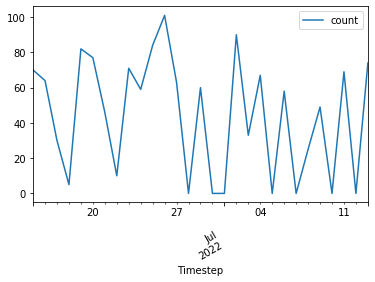

In [26]:
site_2629_visit_data_2.plot(subplots=True)

,count
Timestep,
2019-08-01,NaN
2019-08-02,294.0
2019-08-03,268.0
2019-08-04,545.0
2019-08-05,497.0
...,...
2019-10-27,220.0
2019-10-28,209.0
2019-10-29,125.0


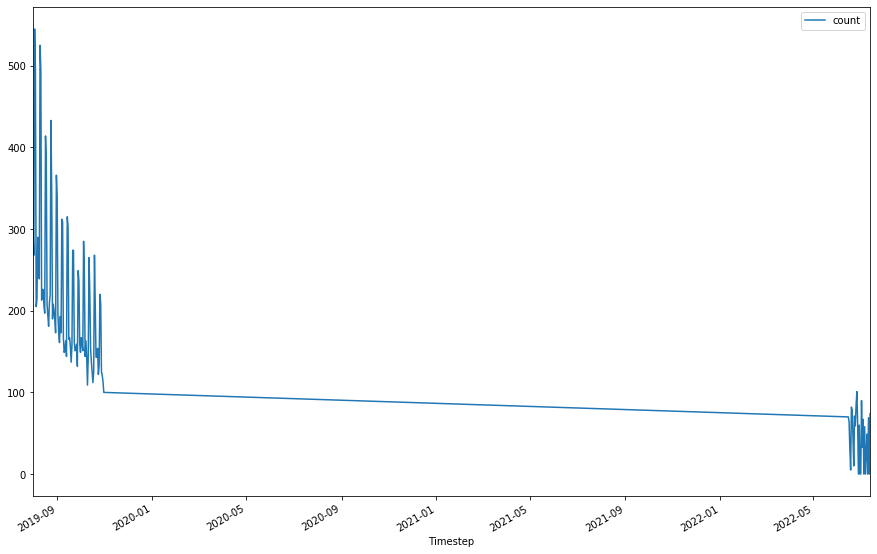

In [21]:
df = pd.concat([site_2629_visit_data, site_2629_visit_data_2])
df.plot(subplots=True, figsize=(15, 10))
df.head(121)
y_pred = site_2629_visit_data.shift(1)
y_pred



<h1 style="font-size:2em;color:#2467C0">Time series windowing</h1>

In [27]:
def univariate_data(dataset, start_index, end_index, history_size, target_size,  single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
#     print(dataset.shape)        
    data.append(np.reshape(dataset[indices], (history_size, 1)))
#     print(dataset.shape)
#     labels.append(dataset[i+target_size])
    if single_step:
      labels.append(dataset[i+target_size])
    else:
      labels.append(dataset[i:i+target_size])
    
  return np.array(data), np.array(labels)

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

def normalize(data, train_split):
    mean = data[:TRAIN_SPLIT].mean()
    std = data[:TRAIN_SPLIT].std()
    data = (data-mean)/std
    return data

def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  STEP = 1

  plt.plot(num_in, np.array(history), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [28]:
TRAIN_SPLIT = 60

In [31]:
site_2629_visit_values = normalize(site_2629_visit_data.values, TRAIN_SPLIT)
site_2629_visit_values.shape

(92, 1)

In [32]:
univariate_past_history = 5
univariate_future_target = 5

x_train, y_train = univariate_data(site_2629_visit_values, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val, y_val = univariate_data(site_2629_visit_values, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [33]:
print ('Single window of past history')
print (x_train[0])
print(x_train.shape[-2:])
print (x_train[2])
print ('\n Target temperature to predict')
print (y_train[0])


Single window of past history
[[294]
 [268]
 [545]
 [497]
 [205]]
(5, 1)
[[545]
 [497]
 [205]
 [214]
 [290]]

 Target temperature to predict
[[214]
 [290]
 [253]
 [239]
 [525]]


In [34]:
# site_2629_visit_data.plot()
multi_step_plot([x_train[0], y_train[0]], 0, 'site-2629-data')

TypeError: object of type 'int' has no len()

<Figure size 864x432 with 0 Axes>

In [35]:
import tensorflow as tf
BUFFER_SIZE = 10000
BATCH_SIZE = 100
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [35]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')
y_train.shape

(55, 5, 1)

In [36]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(16,
                                          return_sequences=True,
                                          input_shape=x_train.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(8, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(5))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [37]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

NameError: name 'simple_lstm_model' is not defined

In [39]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

multi_step_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 51.2122 - val_loss: 34.3388
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 51.0873 - val_loss: 37.4723
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 50.8614 - val_loss: 35.0587
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 50.6248 - val_loss: 41.1619
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 50.4604 - val_loss: 43.7822
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 50.2129 - val_loss: 33.8810
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 50.0099 - val_loss: 35.2276
Epoch 8/10
200/200 [==============================] - 1s 6ms/step - loss: 49.7509 - val_loss: 44.1012
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 49.4435 - val_loss: 34.7854
Epoch 10/10
200/200 [==================

In [ ]:
for x, y in train_data.take(1):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f730e10ac90>],
      dtype=object)

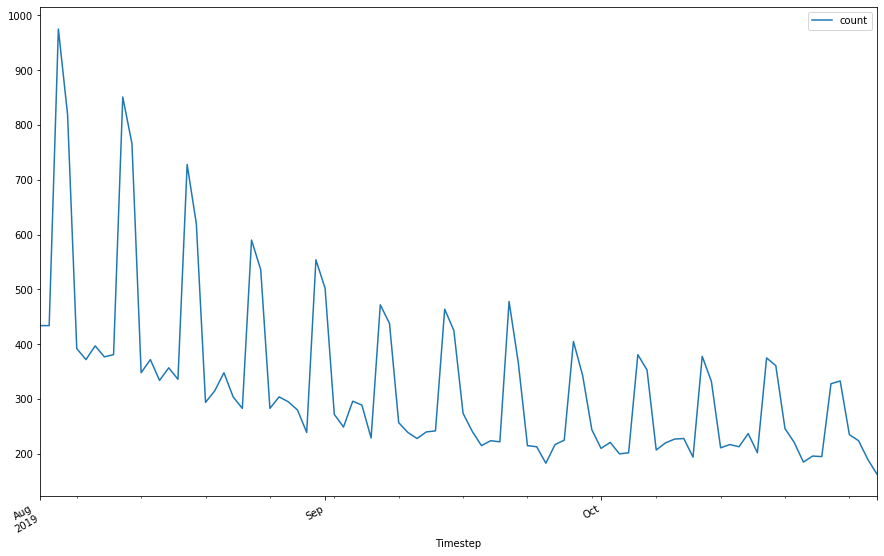

In [40]:
df = pd.concat([site_5298_visit_data, site_5298_visit_data_2])
site_5298_visit_data.plot(subplots=True, figsize=(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f730e0cb410>],
      dtype=object)

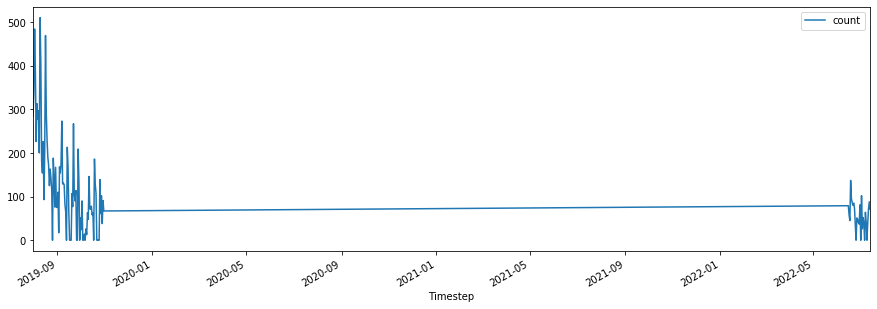

In [41]:
df = pd.concat([site_5299_visit_data, site_5299_visit_data_2])
df.plot(subplots=True, figsize=(15, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f730e017310>],
      dtype=object)

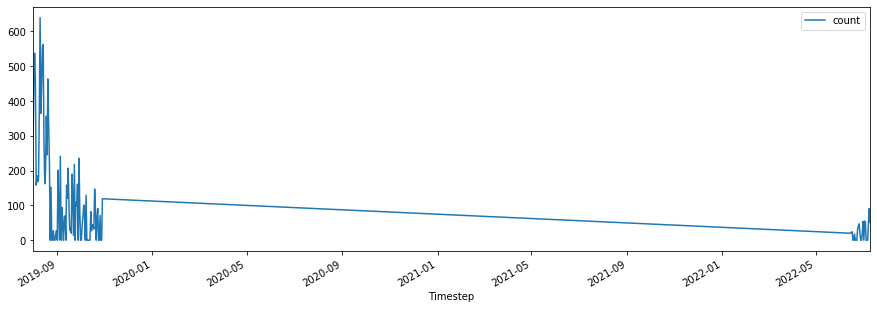

In [42]:
df = pd.concat([site_10648_visit_data, site_10648_visit_data_2])
df.plot(subplots=True, figsize=(15, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f730df87990>],
      dtype=object)

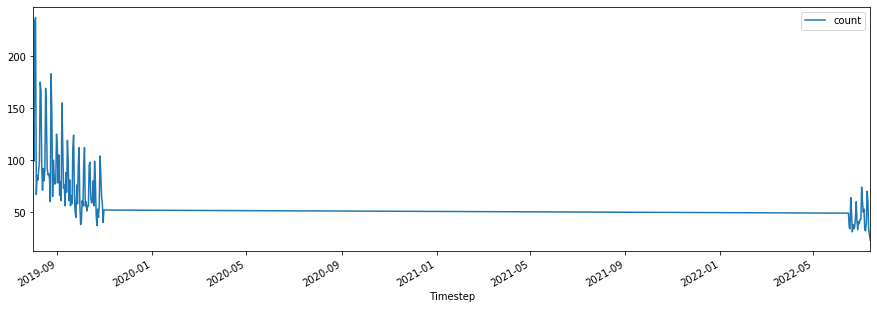

In [43]:
df = pd.concat([site_7976_visit_data, site_7976_visit_data_2])
df.plot(subplots=True, figsize=(15, 5))

In [ ]:
rr_0260_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0260-RunDataTable.tsv'

In [ ]:
rr_0260_data = pd.read_csv(rr_0260_data_file,delimiter='\t',encoding='utf-8', index_col=False)
del rr_0260_data['Notes']
rr_0260_data.head()

In [ ]:
rr_0260_data['VariableName'].unique()

In [ ]:
temp=rr_0260_data[rr_0260_data['VariableName']=='Checkin']
rr_0260_site_2629_checkin_data = temp[temp['Value']=='Site-2629']
rr_0260_site_5298_checkin_data = temp[temp['Value']=='Site-5298']
rr_0260_site_5299_checkin_data = temp[temp['Value']=='Site-5299']
rr_0260_site_10648_checkin_data = temp[temp['Value']=='Site-10648']
rr_0260_site_7976_checkin_data = temp[temp['Value']=='Site-7976']
rr_0260_site_2629_checkin_data

In [ ]:
rr_0260_site_2629_total_checkin_data = rr_0260_site_2629_checkin_data.groupby('Timestep')[['EntityIdx']].count()
print(rr_0260_site_2629_total_checkin_data.count())
rr_0260_site_2629_total_checkin_data.index = pd.to_datetime(rr_0260_site_2629_total_checkin_data.index)
rr_0260_site_2629_total_checkin_data =  rr_0260_site_2629_total_checkin_data.resample('D').sum()
rr_0260_site_2629_total_checkin_data.count()

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
rr_0260_data_file</p>